# Import Library

In [57]:
!pip install Sastrawi
!pip install nltk

In [58]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download("punkt")

import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Import Data

In [59]:
df = pd.read_csv('dataset_sms_spam_v1.csv')
df.sample(5)

,Teks,label
20,Awal bulan saat nya anda eksis lebih lama! Int...,2
425,PESAN RESMI PT.3Care Indonesia Berkat isi Ulan...,1
655,"Baik Pak, bsk sekalian kami bawa form penilaia...",0
144,Nikmati Double Internetan di jaringan Data ter...,2
366,MEGA CELL Cari agen pulsa 1 Cip ke semua Opera...,1


In [60]:
def info(label):
  if label ==0:
    return 'SMS Normal'
  elif label ==1:
    return 'SMS Penipuan'
  elif label ==2:
    return 'SMS Promo'

df['info_label']=df['label'].map(info)
display(df.head())

,Teks,label,info_label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo


In [61]:
df.shape

(1143, 3)

# Data Cleaning

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Teks        1143 non-null   object
 1   label       1143 non-null   int64 
 2   info_label  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [63]:
df.isnull().sum()

Teks          0
label         0
info_label    0
dtype: int64

In [64]:
df.duplicated().sum()

1

In [65]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [66]:
df.duplicated().sum()

0

In [67]:
df.shape

(1142, 3)

# EDA

In [68]:
df['label'].value_counts()

0    568
1    335
2    239
Name: label, dtype: int64

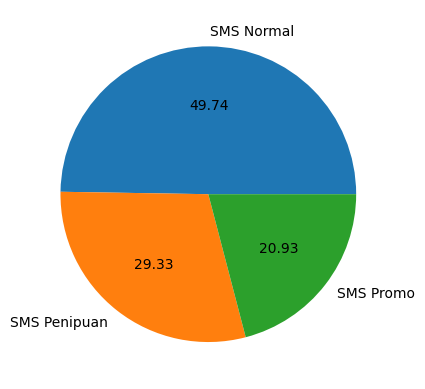

In [69]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['SMS Normal','SMS Penipuan', 'SMS Promo'],autopct="%0.2f")
plt.show()

In [70]:
df['jumlah_karakter'] = df['Teks'].apply(len)
df['jumlah_kata'] = df['Teks'].apply(lambda x:len(nltk.word_tokenize(x)))
df['jumlah_kalimat'] = df['Teks'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Teks,label,info_label,jumlah_karakter,jumlah_kata,jumlah_kalimat
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,153,32,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,152,34,4
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,152,29,2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,153,29,2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,113,25,3


In [71]:
df[['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,1142.000000,1142.000000,1142.000000
mean,108.757443,19.957093,1.802102
std,59.098470,10.487123,1.125466
min,13.000000,3.000000,1.000000
25%,58.000000,11.000000,1.000000
50%,113.000000,20.000000,1.000000
75%,152.000000,26.000000,2.000000
max,434.000000,83.000000,11.000000


In [72]:
#sms normal
df[df['label'] == 0][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,568.000000,568.000000,568.000000
mean,70.519366,13.820423,1.468310
std,46.267030,8.554389,0.843514
min,13.000000,3.000000,1.000000
25%,42.000000,8.000000,1.000000
50%,58.500000,12.000000,1.000000
75%,83.250000,17.000000,2.000000
max,434.000000,73.000000,11.000000


In [73]:
#sms penipuan
df[df['label'] == 1][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,335.000000,335.000000,335.000000
mean,150.835821,25.068657,1.704478
std,49.443731,9.031784,1.052148
min,46.000000,7.000000,1.000000
25%,134.500000,20.000000,1.000000
50%,151.000000,24.000000,1.000000
75%,159.000000,28.500000,2.000000
max,431.000000,70.000000,7.000000


In [74]:
#sms promo
df[df['label'] == 2][['jumlah_karakter','jumlah_kata','jumlah_kalimat']].describe()

,jumlah_karakter,jumlah_kata,jumlah_kalimat
count,239.000000,239.000000,239.000000
mean,140.652720,27.376569,2.732218
std,34.788568,7.517517,1.294562
min,50.000000,9.000000,1.000000
25%,123.000000,23.000000,2.000000
50%,142.000000,27.000000,3.000000
75%,156.000000,31.000000,4.000000
max,321.000000,83.000000,8.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22888\1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

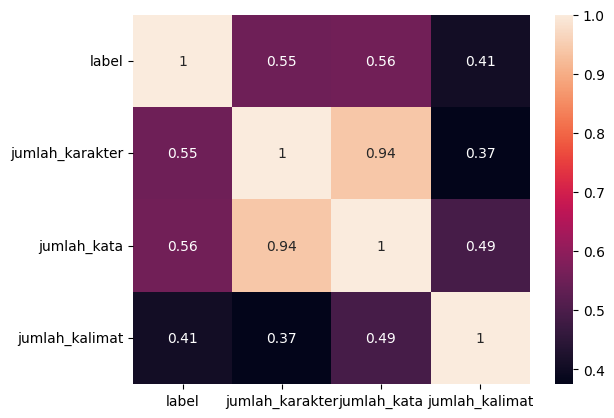

In [75]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

#Data Preprocessing

In [76]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
def prepo_text(data):
  data = str(data) #mengubah data dalam bentuk string 
  data = data.lower() #mengubah data menjadi lowercase
  return data

df['lower_teks'] = df['Teks'].apply(prepo_text)
df

,Teks,label,info_label,jumlah_karakter,jumlah_kata,jumlah_kalimat,lower_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,153,32,2,[promo] beli paket flash mulai 1gb di my telko...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,152,34,4,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,152,29,2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ..."
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,153,29,2,"2016-08-07 11:29:47.plg yth, sisa kuota flash ..."
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,113,25,3,4.5gb/30 hari hanya rp 55 ribu spesial buat an...
...,...,...,...,...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,SMS Normal,46,10,1,"yooo sama2, oke nanti aku umumin di grup kelas"
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,SMS Normal,52,10,2,😁 sebelumnya ga ad nulis kerudung. kirain warn...
1140,Mba mau kirim 300 ya,0,SMS Normal,20,5,1,mba mau kirim 300 ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,SMS Normal,51,10,1,nama1 beaok bwrangkat pagi...mau cas atay tra...


In [78]:
import re
from string import punctuation, digits
from nltk.corpus import stopwords
from nltk import word_tokenize

list_stopwords= set(stopwords.words('indonesian'))
def cleaning_text(data):
  data= re.sub(f"[{re.escape(punctuation + digits)}]", "", data) # menghapus punctuation dan angka
  data = " ".join(data.split()) # menghapus extra spasi, tabs, dan baris baru
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  data = stemmer.stem(data) #Stemming data with Sastrawi
  word_token = word_tokenize(data)
  clean_tokens = [w for w in word_token if not w in list_stopwords]  
  return clean_tokens

In [79]:
df['cleaning_teks'] = df['lower_teks'].apply(cleaning_text)
df.head()

,Teks,label,info_label,jumlah_karakter,jumlah_kata,jumlah_kalimat,lower_teks,cleaning_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,153,32,2,[promo] beli paket flash mulai 1gb di my telko...,"[promo, beli, paket, flash, gb, my, telkomsel,..."
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,152,34,4,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...,"[gb, rp, ribu, spesial, pilih, aktif, promo, s..."
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,152,29,2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m..."
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,153,29,2,"2016-08-07 11:29:47.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m..."
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,113,25,3,4.5gb/30 hari hanya rp 55 ribu spesial buat an...,"[gb, rp, ribu, spesial, pilih, aktif, buru, skb]"


#Word Embedding

##word2vec

In [80]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [81]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [82]:
wv = api.load('glove-twitter-50')
type(wv)

[==================================================] 100.0% 199.5/199.5MB downloaded


gensim.models.keyedvectors.KeyedVectors

In [83]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [84]:
df['vec'] = df['cleaning_teks'].apply(sent_vec)
df.head()

,Teks,label,info_label,jumlah_karakter,jumlah_kata,jumlah_kalimat,lower_teks,cleaning_teks,vec
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,153,32,2,[promo] beli paket flash mulai 1gb di my telko...,"[promo, beli, paket, flash, gb, my, telkomsel,...","[-0.05610815952531993, 0.3164000459015369, -0...."
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,152,34,4,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...,"[gb, rp, ribu, spesial, pilih, aktif, promo, s...","[0.043447997206105635, 0.1518254646888146, -0...."
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,152,29,2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m...","[-0.013731006000723158, 0.31625206981386456, -..."
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,153,29,2,"2016-08-07 11:29:47.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m...","[-0.013731006000723158, 0.31625206981386456, -..."
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,113,25,3,4.5gb/30 hari hanya rp 55 ribu spesial buat an...,"[gb, rp, ribu, spesial, pilih, aktif, buru, skb]","[-0.03377110635240873, 0.15747900638315412, -0..."


In [85]:
X = df['vec'].to_list()
y = df['label'].values

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [87]:
from sklearn.preprocessing import MinMaxScaler #Scaling Data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [89]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy Score: ', accuracy_score(y_test,y_pred))

[[115   4   0]
 [ 33  35   0]
 [ 25  14   3]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       119
           1       0.66      0.51      0.58        68
           2       1.00      0.07      0.13        42

    accuracy                           0.67       229
   macro avg       0.78      0.52      0.50       229
weighted avg       0.72      0.67      0.61       229

Accuracy Score:  0.6681222707423581


# TF-IDF

In [90]:
def prepo_text(data):
  data = str(data) #mengubah data dalam bentuk string 
  data = data.lower() #mengubah data menjadi lowercase
  return data

df['clean'] = df['Teks'].apply(prepo_text)
df

,Teks,label,info_label,jumlah_karakter,jumlah_kata,jumlah_kalimat,lower_teks,cleaning_teks,vec,clean
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,153,32,2,[promo] beli paket flash mulai 1gb di my telko...,"[promo, beli, paket, flash, gb, my, telkomsel,...","[-0.05610815952531993, 0.3164000459015369, -0....",[promo] beli paket flash mulai 1gb di my telko...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,152,34,4,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...,"[gb, rp, ribu, spesial, pilih, aktif, promo, s...","[0.043447997206105635, 0.1518254646888146, -0....",2.5 gb/30 hari hanya rp 35 ribu spesial buat a...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,152,29,2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m...","[-0.013731006000723158, 0.31625206981386456, -...","2016-07-08 11:47:11.plg yth, sisa kuota flash ..."
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,153,29,2,"2016-08-07 11:29:47.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m...","[-0.013731006000723158, 0.31625206981386456, -...","2016-08-07 11:29:47.plg yth, sisa kuota flash ..."
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,113,25,3,4.5gb/30 hari hanya rp 55 ribu spesial buat an...,"[gb, rp, ribu, spesial, pilih, aktif, buru, skb]","[-0.03377110635240873, 0.15747900638315412, -0...",4.5gb/30 hari hanya rp 55 ribu spesial buat an...
...,...,...,...,...,...,...,...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,SMS Normal,46,10,1,"yooo sama2, oke nanti aku umumin di grup kelas","[yooo, oke, umumin, grup, kelas]","[0.2739500068128109, 0.6180158331990242, -0.02...","yooo sama2, oke nanti aku umumin di grup kelas"
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,SMS Normal,52,10,2,😁 sebelumnya ga ad nulis kerudung. kirain warn...,"[ga, ad, nulis, kerudung, kirain, warna, jins]","[-0.08586375415325165, 0.1264049932360649, 0.0...",😁 sebelumnya ga ad nulis kerudung. kirain warn...
1140,Mba mau kirim 300 ya,0,SMS Normal,20,5,1,mba mau kirim 300 ya,"[mba, kirim, ya]","[-0.008954998105764389, 0.8530749976634979, -0...",mba mau kirim 300 ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,SMS Normal,51,10,1,nama1 beaok bwrangkat pagi...mau cas atay tra...,"[nama, beaok, bwrangkat, pagimau, cas, atay, t...","[0.04643450273821751, 0.334409994383653, -0.08...",nama1 beaok bwrangkat pagi...mau cas atay tra...


In [91]:
import re
from string import punctuation, digits
from nltk.corpus import stopwords
from nltk import word_tokenize

list_stopwords= set(stopwords.words('indonesian'))
def cleaning_text(data):
  data= re.sub(f"[{re.escape(punctuation + digits)}]", "", data) # menghapus punctuation dan angka
  data = " ".join(data.split()) # menghapus extra spasi, tabs, dan baris baru
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  data = stemmer.stem(data) #Stemming data with Sastrawi
  word_token = word_tokenize(data)
  clean_tokens = [w for w in word_token if not w in list_stopwords]  
  return clean_tokens

df['clean'] = df['clean'].apply(cleaning_text)
df['clean'] = df['clean'].apply(' '.join) #menghilangkan list
df

,Teks,label,info_label,jumlah_karakter,jumlah_kata,jumlah_kalimat,lower_teks,cleaning_teks,vec,clean
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,153,32,2,[promo] beli paket flash mulai 1gb di my telko...,"[promo, beli, paket, flash, gb, my, telkomsel,...","[-0.05610815952531993, 0.3164000459015369, -0....",promo beli paket flash gb my telkomsel app dpt...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,152,34,4,2.5 gb/30 hari hanya rp 35 ribu spesial buat a...,"[gb, rp, ribu, spesial, pilih, aktif, promo, s...","[0.043447997206105635, 0.1518254646888146, -0....",gb rp ribu spesial pilih aktif promo sd nov bu...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,152,29,2,"2016-07-08 11:47:11.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m...","[-0.013731006000723158, 0.31625206981386456, -...",plg yth sisa kuota flash kb download mytelkoms...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,153,29,2,"2016-08-07 11:29:47.plg yth, sisa kuota flash ...","[plg, yth, sisa, kuota, flash, kb, download, m...","[-0.013731006000723158, 0.31625206981386456, -...",plg yth sisa kuota flash kb download mytelkoms...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,113,25,3,4.5gb/30 hari hanya rp 55 ribu spesial buat an...,"[gb, rp, ribu, spesial, pilih, aktif, buru, skb]","[-0.03377110635240873, 0.15747900638315412, -0...",gb rp ribu spesial pilih aktif buru skb
...,...,...,...,...,...,...,...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,SMS Normal,46,10,1,"yooo sama2, oke nanti aku umumin di grup kelas","[yooo, oke, umumin, grup, kelas]","[0.2739500068128109, 0.6180158331990242, -0.02...",yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,SMS Normal,52,10,2,😁 sebelumnya ga ad nulis kerudung. kirain warn...,"[ga, ad, nulis, kerudung, kirain, warna, jins]","[-0.08586375415325165, 0.1264049932360649, 0.0...",ga ad nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,SMS Normal,20,5,1,mba mau kirim 300 ya,"[mba, kirim, ya]","[-0.008954998105764389, 0.8530749976634979, -0...",mba kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,SMS Normal,51,10,1,nama1 beaok bwrangkat pagi...mau cas atay tra...,"[nama, beaok, bwrangkat, pagimau, cas, atay, t...","[0.04643450273821751, 0.334409994383653, -0.08...",nama beaok bwrangkat pagimau cas atay tranfer


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df = 5, max_df = 0.95)
X_stem = vectorizer.fit_transform(df['clean'])

In [93]:
#split data menjadi data train dan data test
y = df['label'] 
X_train_stem, X_test_stem, Y_train_stem, Y_test_stem =train_test_split(X_stem,y, test_size = 0.2, random_state = 0, stratify = y)

## Modelling

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df['clean'],  df['label'], test_size=0.2, random_state=0, stratify = y)
text_clf = Pipeline([('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', MultinomialNB())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [104]:
Y_pred = text_clf.predict(X_test)
# confusion matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
print(cnf_matrix)
print(classification_report(y_test, Y_pred))
print('Accuracy Score: ', accuracy_score(y_test,Y_pred))

[[111   1   2]
 [  8  55   4]
 [  1   2  45]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       114
           1       0.95      0.82      0.88        67
           2       0.88      0.94      0.91        48

    accuracy                           0.92       229
   macro avg       0.92      0.91      0.91       229
weighted avg       0.92      0.92      0.92       229

Accuracy Score:  0.9213973799126638


In [94]:
mnb = MultinomialNB()
mnb.fit(X_train_stem, Y_train_stem)
Y_pred_stem = mnb.predict(X_test_stem)
Y_pred_tr_stem = mnb.predict(X_train_stem)
# confusion matrix
cnf_matrix = confusion_matrix(Y_test_stem, Y_pred_stem)
print(cnf_matrix)
print(classification_report(Y_test_stem, Y_pred_stem))
print('Accuracy Score: ', accuracy_score(Y_test_stem,Y_pred_stem))

[[108   2   4]
 [  5  55   7]
 [  0   2  46]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       114
           1       0.93      0.82      0.87        67
           2       0.81      0.96      0.88        48

    accuracy                           0.91       229
   macro avg       0.90      0.91      0.90       229
weighted avg       0.92      0.91      0.91       229

Accuracy Score:  0.9126637554585153


## SVM

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'gamma': [0.1, 1.0, 10, 100]},
             verbose=2)
search.fit(X_train_stem, Y_train_stem)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10, 100],
                         'gamma': [0.1, 1.0, 10, 100]},
             verbose=2)

In [99]:
search.best_score_, search.best_params_

(0.929889272361231, {'C': 10, 'gamma': 1.0})

In [100]:
svm = SVC(C = 10, gamma = 1.0)
svm.fit(X_train_stem, Y_train_stem)
Y_pred_stem = svm.predict(X_test_stem)
Y_pred_tr_stem = svm.predict(X_train_stem)
# confusion matrix
cnf_matrix = confusion_matrix(Y_test_stem, Y_pred_stem)
print(cnf_matrix)
print(classification_report(Y_test_stem, Y_pred_stem))
print('Accuracy Score: ', accuracy_score(Y_test_stem,Y_pred_stem))

[[111   1   2]
 [  5  59   3]
 [  1   1  46]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       114
           1       0.97      0.88      0.92        67
           2       0.90      0.96      0.93        48

    accuracy                           0.94       229
   macro avg       0.94      0.94      0.94       229
weighted avg       0.94      0.94      0.94       229

Accuracy Score:  0.9432314410480349
